In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

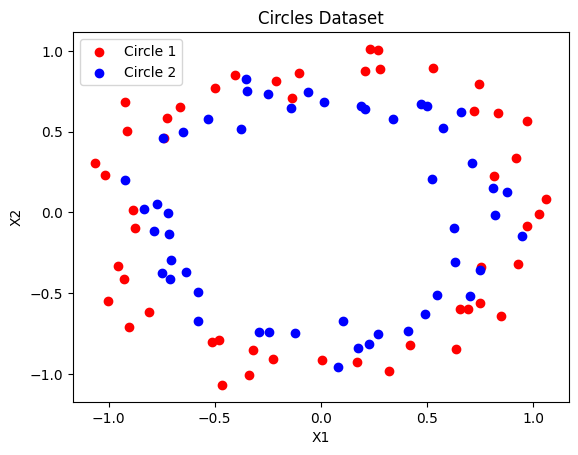

In [6]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Circle 1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Circle 2')

# Add labels and legend
plt.title('Circles Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

# Show the plot
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [8]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

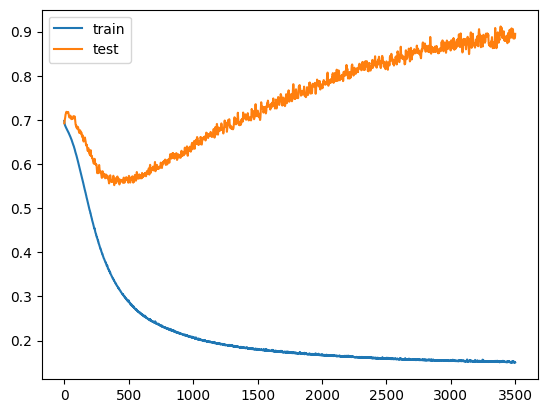

In [11]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 21s 2ms/step


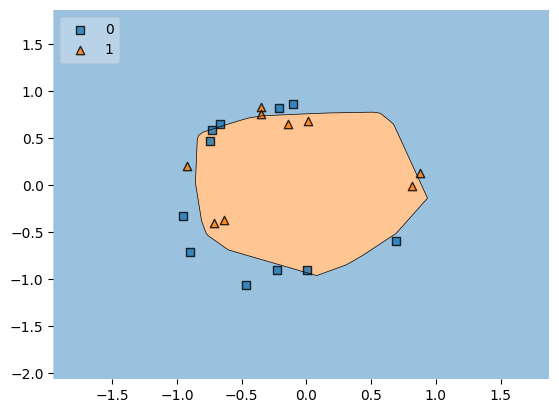

In [12]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [13]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [16]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 2s 190ms/step - loss: 0.6955 - accuracy: 0.5000 - val_loss: 0.6882 - val_accuracy: 0.5500
Epoch 2/3500
3/3 [==============================] - 0s 38ms/step - loss: 0.6936 - accuracy: 0.4875 - val_loss: 0.6907 - val_accuracy: 0.5000
Epoch 3/3500
3/3 [==============================] - 0s 36ms/step - loss: 0.6920 - accuracy: 0.5250 - val_loss: 0.6919 - val_accuracy: 0.4000
Epoch 4/3500
3/3 [==============================] - 0s 35ms/step - loss: 0.6907 - accuracy: 0.5250 - val_loss: 0.6924 - val_accuracy: 0.4500
Epoch 5/3500
3/3 [==============================] - 0s 39ms/step - loss: 0.6900 - accuracy: 0.5125 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 6/3500
3/3 [==============================] - 0s 34ms/step - loss: 0.6891 - accuracy: 0.5125 - val_loss: 0.6952 - val_accuracy: 0.5500
Epoch 7/3500
3/3 [==============================] - 0s 34ms/step - loss: 0.6884 - accuracy: 0.5250 - val_loss: 0.6972 - val_accuracy: 0.6500
Epoch 8/3500

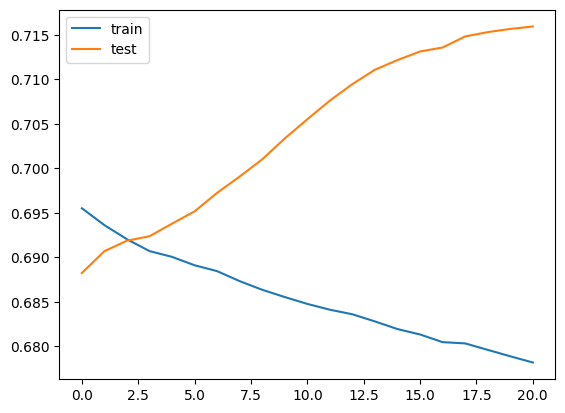

In [17]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 21s 2ms/step


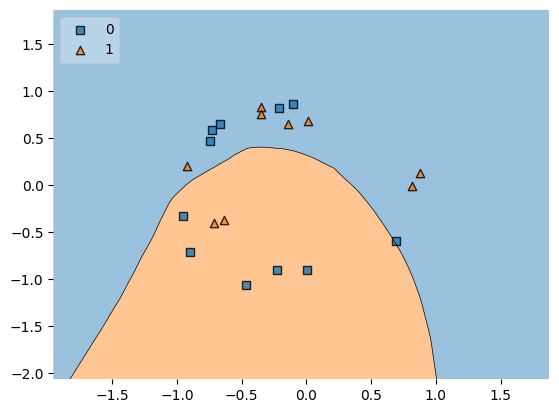

In [18]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()